In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [277]:
df = pd.read_csv(r"/content/Most_Streamed_Spotify_Songs_2024.csv",encoding='latin')

In [278]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [279]:
df["Release Date"].isnull().sum()

0

In [280]:
# find NAN in all the columns

columns_without_null_values = []
columns_with_null_values = []

for i in df.columns:
  if df[i].isnull().sum() == 0:
    columns_without_null_values.append(i)

  elif df[i].isnull().sum()>0:
    columns_with_null_values.append(i)
  else:
    print("Not Successed")

print("Columns without null values are : ",columns_without_null_values)

print("columns with null values are : ", columns_with_null_values)

Columns without null values are :  ['Track', 'Album Name', 'Release Date', 'ISRC', 'All Time Rank', 'Track Score', 'Explicit Track']
columns with null values are :  ['Artist', 'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach', 'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins', 'Deezer Playlist Count', 'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations', 'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity']


In [281]:
df["Artist"].isnull().sum()

5

In [282]:
null_values_columns = ['Artist', 'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
                       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes',
                       'TikTok Views','YouTube Playlist Reach', 'Apple Music Playlist Count', 'AirPlay Spins',
                       'SiriusXM Spins', 'Deezer Playlist Count','Deezer Playlist Reach',
                       'Amazon Playlist Count','Pandora Streams', 'Pandora Track Stations',
                       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity']

for i in null_values_columns:

  print("Number of null values in  :",i,"is: ", df[i].isnull().sum())




Number of null values in  : Artist is:  5
Number of null values in  : Spotify Streams is:  113
Number of null values in  : Spotify Playlist Count is:  70
Number of null values in  : Spotify Playlist Reach is:  72
Number of null values in  : Spotify Popularity is:  804
Number of null values in  : YouTube Views is:  308
Number of null values in  : YouTube Likes is:  315
Number of null values in  : TikTok Posts is:  1173
Number of null values in  : TikTok Likes is:  980
Number of null values in  : TikTok Views is:  981
Number of null values in  : YouTube Playlist Reach is:  1009
Number of null values in  : Apple Music Playlist Count is:  561
Number of null values in  : AirPlay Spins is:  498
Number of null values in  : SiriusXM Spins is:  2123
Number of null values in  : Deezer Playlist Count is:  921
Number of null values in  : Deezer Playlist Reach is:  928
Number of null values in  : Amazon Playlist Count is:  1055
Number of null values in  : Pandora Streams is:  1106
Number of null va

In [283]:
len(df["TIDAL Popularity"]) # since all the values are null we can drop this from df

4600

##### since we don't know the which features can be used for future purposes so we cannot drop all the columnswith null valuse so we decided to drop the columns with more than 2000 null values ("setting up a threshold")

In [284]:
# df.drop("TIDAL Popularity",axis = 1)

for i in null_values_columns:

  if df[i].isnull().sum()>2000:
    df = df.drop(i,axis=1)
df.shape

(4600, 26)

In [285]:
null_values_columns = ['Artist', 'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
                       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes',
                       'TikTok Views','YouTube Playlist Reach', 'Apple Music Playlist Count', 'AirPlay Spins',
                      'Deezer Playlist Count','Deezer Playlist Reach',
                       'Amazon Playlist Count','Pandora Streams', 'Pandora Track Stations',
                      'Shazam Counts']

for i in null_values_columns:

  print("Number of null values in  :",i,"is: ", df[i].isnull().sum())

Number of null values in  : Artist is:  5
Number of null values in  : Spotify Streams is:  113
Number of null values in  : Spotify Playlist Count is:  70
Number of null values in  : Spotify Playlist Reach is:  72
Number of null values in  : Spotify Popularity is:  804
Number of null values in  : YouTube Views is:  308
Number of null values in  : YouTube Likes is:  315
Number of null values in  : TikTok Posts is:  1173
Number of null values in  : TikTok Likes is:  980
Number of null values in  : TikTok Views is:  981
Number of null values in  : YouTube Playlist Reach is:  1009
Number of null values in  : Apple Music Playlist Count is:  561
Number of null values in  : AirPlay Spins is:  498
Number of null values in  : Deezer Playlist Count is:  921
Number of null values in  : Deezer Playlist Reach is:  928
Number of null values in  : Amazon Playlist Count is:  1055
Number of null values in  : Pandora Streams is:  1106
Number of null values in  : Pandora Track Stations is:  1268
Number of

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [287]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,"150,597,040",210.0,"40,975",62.0,"17,598,718",114.0,"18,004,655","22,931","2,669,262",0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,"156,380,351",188.0,"40,778",67.0,"10,422,430",111.0,"7,780,028","28,444","1,118,279",1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,"373,784,955",190.0,"74,333",136.0,"36,321,847",172.0,"5,022,621","5,639","5,285,340",0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"3,351,188,582",394.0,"1,474,799",264.0,"24,684,248",210.0,"190,260,277","203,384","11,822,942",0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,"112,763,851",182.0,"12,185",82.0,"17,660,624",105.0,"4,493,884","7,006","457,017",1


#### so here we need to split the Release date into date months and year so as to convert the datatype into int after that we can replace the missing values with mean or mode value

In [288]:
df["Date"] = df["Release Date"].str.split('/')
df["Month"] = df["Release Date"].str.split('/')
df["Year"] = df["Release Date"].str.split('/')

In [289]:
df["date"] = df["Release Date"].str.split('/').str[1]
df["Month"] = df["Release Date"].str.split('/').str[0]
df["Year"] = df["Release Date"].str.split('/').str[2]

In [290]:
df.head()
df = df.drop(["Release Date","Date"],axis = 1)

In [291]:
df = df.drop("ISRC",axis = 1)

In [292]:
df.columns

Index(['Track', 'Album Name', 'Artist', 'All Time Rank', 'Track Score',
       'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'Deezer Playlist Count',
       'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams',
       'Pandora Track Stations', 'Shazam Counts', 'Explicit Track', 'Month',
       'Year', 'date'],
      dtype='object')

In [293]:
df.head()

,Track,Album Name,Artist,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,...,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track,Month,Year,date
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,1,725.4,"390,470,936","30,716","196,631,588",92.0,"84,274,754",...,62.0,"17,598,718",114.0,"18,004,655","22,931","2,669,262",0,4,2024,26
1,Not Like Us,Not Like Us,Kendrick Lamar,2,545.9,"323,703,884","28,113","174,597,137",92.0,"116,347,040",...,67.0,"10,422,430",111.0,"7,780,028","28,444","1,118,279",1,5,2024,4
2,i like the way you kiss me,I like the way you kiss me,Artemas,3,538.4,"601,309,283","54,331","211,607,669",92.0,"122,599,116",...,136.0,"36,321,847",172.0,"5,022,621","5,639","5,285,340",0,3,2024,19
3,Flowers,Flowers - Single,Miley Cyrus,4,444.9,"2,031,280,633","269,802","136,569,078",85.0,"1,096,100,899",...,264.0,"24,684,248",210.0,"190,260,277","203,384","11,822,942",0,1,2023,12
4,Houdini,Houdini,Eminem,5,423.3,"107,034,922","7,223","151,469,874",88.0,"77,373,957",...,82.0,"17,660,624",105.0,"4,493,884","7,006","457,017",1,5,2024,31


In [294]:
columns_without_null_values = []
columns_with_null_values = []

for i in df.columns:
  if df[i].isnull().sum() == 0:
    columns_without_null_values.append(i)

  elif df[i].isnull().sum()>0:
    columns_with_null_values.append(i)
  else:
    print("Not Successed")

print("Columns without null values are : ",columns_without_null_values)

print("columns with null values are : ", columns_with_null_values)

Columns without null values are :  ['Track', 'Album Name', 'All Time Rank', 'Track Score', 'Explicit Track', 'Month', 'Year', 'date']
columns with null values are :  ['Artist', 'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach', 'Apple Music Playlist Count', 'AirPlay Spins', 'Deezer Playlist Count', 'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations', 'Shazam Counts']


In [295]:
null_values_columns = ['Artist', 'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
                       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes',
                       'TikTok Views','YouTube Playlist Reach', 'Apple Music Playlist Count', 'AirPlay Spins',
                       'Deezer Playlist Count','Deezer Playlist Reach',
                       'Amazon Playlist Count','Pandora Streams', 'Pandora Track Stations',
                       'Shazam Counts']

for i in null_values_columns:

  print("Number of null values in  :",i,"is: ", df[i].isnull().sum())


Number of null values in  : Artist is:  5
Number of null values in  : Spotify Streams is:  113
Number of null values in  : Spotify Playlist Count is:  70
Number of null values in  : Spotify Playlist Reach is:  72
Number of null values in  : Spotify Popularity is:  804
Number of null values in  : YouTube Views is:  308
Number of null values in  : YouTube Likes is:  315
Number of null values in  : TikTok Posts is:  1173
Number of null values in  : TikTok Likes is:  980
Number of null values in  : TikTok Views is:  981
Number of null values in  : YouTube Playlist Reach is:  1009
Number of null values in  : Apple Music Playlist Count is:  561
Number of null values in  : AirPlay Spins is:  498
Number of null values in  : Deezer Playlist Count is:  921
Number of null values in  : Deezer Playlist Reach is:  928
Number of null values in  : Amazon Playlist Count is:  1055
Number of null values in  : Pandora Streams is:  1106
Number of null values in  : Pandora Track Stations is:  1268
Number of

In [296]:
df = df.dropna(subset = "Spotify Streams")
df = df.dropna(subset = "YouTube Views")

df["Spotify Streams"].isna().sum()

0

In [297]:
df['Spotify Streams'] = df['Spotify Streams'].str.replace(',', '').astype(int)
df['YouTube Views'] = df['YouTube Views'].str.replace(',', '').astype(int)

In [298]:
df["Spotify Streams"]

0        390470936
1        323703884
2        601309283
3       2031280633
4        107034922
           ...    
4595     305049963
4596      52282360
4597     189972685
4598     145467020
4599     255740653
Name: Spotify Streams, Length: 4218, dtype: int64

In [299]:
df["YouTube Views"].astype(int)

0         84274754
1        116347040
2        122599116
3       1096100899
4         77373957
           ...    
4595     149247747
4596     943920245
4597     201027333
4598    1118595159
4599     866300755
Name: YouTube Views, Length: 4218, dtype: int64

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4218 entries, 0 to 4599
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4218 non-null   object 
 1   Album Name                  4218 non-null   object 
 2   Artist                      4218 non-null   object 
 3   All Time Rank               4218 non-null   object 
 4   Track Score                 4218 non-null   float64
 5   Spotify Streams             4218 non-null   int64  
 6   Spotify Playlist Count      4214 non-null   object 
 7   Spotify Playlist Reach      4214 non-null   object 
 8   Spotify Popularity          3671 non-null   float64
 9   YouTube Views               4218 non-null   int64  
 10  YouTube Likes               4211 non-null   object 
 11  TikTok Posts                3331 non-null   object 
 12  TikTok Likes                3520 non-null   object 
 13  TikTok Views                3519 non-n

In [301]:
# Normalise the rest of null values (we dropped the rest null values)

null_values_columns = ['Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
                       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes',
                       'TikTok Views','YouTube Playlist Reach', 'Apple Music Playlist Count', 'AirPlay Spins',
                      'Deezer Playlist Count','Deezer Playlist Reach',
                       'Amazon Playlist Count','Pandora Streams', 'Pandora Track Stations',
                      'Shazam Counts']

for i in null_values_columns:
  df = df.dropna(subset = i)
  df[i].isnull().sum()

# most_freequent_artist = df["Artist"].mode()[0]
# print(most_freequent_artist)

# df["Artist"] = df["Artist"].fillna(most_freequent_artist)


In [302]:
df.columns

Index(['Track', 'Album Name', 'Artist', 'All Time Rank', 'Track Score',
       'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'Deezer Playlist Count',
       'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams',
       'Pandora Track Stations', 'Shazam Counts', 'Explicit Track', 'Month',
       'Year', 'date'],
      dtype='object')

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2072 entries, 0 to 4599
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       2072 non-null   object 
 1   Album Name                  2072 non-null   object 
 2   Artist                      2072 non-null   object 
 3   All Time Rank               2072 non-null   object 
 4   Track Score                 2072 non-null   float64
 5   Spotify Streams             2072 non-null   int64  
 6   Spotify Playlist Count      2072 non-null   object 
 7   Spotify Playlist Reach      2072 non-null   object 
 8   Spotify Popularity          2072 non-null   float64
 9   YouTube Views               2072 non-null   int64  
 10  YouTube Likes               2072 non-null   object 
 11  TikTok Posts                2072 non-null   object 
 12  TikTok Likes                2072 non-null   object 
 13  TikTok Views                2072 non-n

In [304]:
df.info()

#columns_to_dtype_int = ["All Time Rank","Track Score","Spotify Playlist Count"]

columns_dtype_object = [] # dataframe of 1xn ---> List

for i in df.columns:
  if df[i].dtype == "O":
    columns_dtype_object.append(i)


print(columns_dtype_object)

print(len(columns_dtype_object))

<class 'pandas.core.frame.DataFrame'>
Index: 2072 entries, 0 to 4599
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       2072 non-null   object 
 1   Album Name                  2072 non-null   object 
 2   Artist                      2072 non-null   object 
 3   All Time Rank               2072 non-null   object 
 4   Track Score                 2072 non-null   float64
 5   Spotify Streams             2072 non-null   int64  
 6   Spotify Playlist Count      2072 non-null   object 
 7   Spotify Playlist Reach      2072 non-null   object 
 8   Spotify Popularity          2072 non-null   float64
 9   YouTube Views               2072 non-null   int64  
 10  YouTube Likes               2072 non-null   object 
 11  TikTok Posts                2072 non-null   object 
 12  TikTok Likes                2072 non-null   object 
 13  TikTok Views                2072 non-n

In [305]:

print(columns_dtype_object,'\n')

for i in range(3,len(columns_dtype_object)):
  print(columns_dtype_object[i])
  # df[columns_dtype_object[i]].astype(int)


df["All Time Rank"] = df["All Time Rank"].str.replace(",","")

for i in df[columns_dtype_object]:
  df[i] = df[i].str.replace(",","")


['Track', 'Album Name', 'Artist', 'All Time Rank', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach', 'AirPlay Spins', 'Deezer Playlist Reach', 'Pandora Streams', 'Pandora Track Stations', 'Shazam Counts', 'Month', 'Year', 'date'] 

All Time Rank
Spotify Playlist Count
Spotify Playlist Reach
YouTube Likes
TikTok Posts
TikTok Likes
TikTok Views
YouTube Playlist Reach
AirPlay Spins
Deezer Playlist Reach
Pandora Streams
Pandora Track Stations
Shazam Counts
Month
Year
date


In [306]:
df["Spotify Playlist Count"]

0        30716
1        28113
2        54331
3       269802
5       105892
         ...  
4584     65140
4590     42233
4591     84220
4597     72066
4599     32138
Name: Spotify Playlist Count, Length: 2072, dtype: object

In [307]:
df["Track Score"] = df["Track Score"].astype(int)

In [308]:
df["All Time Rank"] = df["All Time Rank"].astype(int)
df["Track Score"] = df["Track Score"].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2072 entries, 0 to 4599
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       2072 non-null   object 
 1   Album Name                  2072 non-null   object 
 2   Artist                      2072 non-null   object 
 3   All Time Rank               2072 non-null   int64  
 4   Track Score                 2072 non-null   int64  
 5   Spotify Streams             2072 non-null   int64  
 6   Spotify Playlist Count      2072 non-null   object 
 7   Spotify Playlist Reach      2072 non-null   object 
 8   Spotify Popularity          2072 non-null   float64
 9   YouTube Views               2072 non-null   int64  
 10  YouTube Likes               2072 non-null   object 
 11  TikTok Posts                2072 non-null   object 
 12  TikTok Likes                2072 non-null   object 
 13  TikTok Views                2072 non-n

In [309]:
df.columns

Index(['Track', 'Album Name', 'Artist', 'All Time Rank', 'Track Score',
       'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'Deezer Playlist Count',
       'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams',
       'Pandora Track Stations', 'Shazam Counts', 'Explicit Track', 'Month',
       'Year', 'date'],
      dtype='object')

In [310]:
for column in df.columns[3:]:
    try:
        df[column] = df[column].astype(int)
    except ValueError:
        print(f"Column {column} contains non-integer values and cannot be converted to int.")

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2072 entries, 0 to 4599
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Track                       2072 non-null   object
 1   Album Name                  2072 non-null   object
 2   Artist                      2072 non-null   object
 3   All Time Rank               2072 non-null   int64 
 4   Track Score                 2072 non-null   int64 
 5   Spotify Streams             2072 non-null   int64 
 6   Spotify Playlist Count      2072 non-null   int64 
 7   Spotify Playlist Reach      2072 non-null   int64 
 8   Spotify Popularity          2072 non-null   int64 
 9   YouTube Views               2072 non-null   int64 
 10  YouTube Likes               2072 non-null   int64 
 11  TikTok Posts                2072 non-null   int64 
 12  TikTok Likes                2072 non-null   int64 
 13  TikTok Views                2072 non-null   int64 
 1

In [312]:
df.head()

,Track,Album Name,Artist,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,...,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track,Month,Year,date
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,1,725,390470936,30716,196631588,92,84274754,...,62,17598718,114,18004655,22931,2669262,0,4,2024,26
1,Not Like Us,Not Like Us,Kendrick Lamar,2,545,323703884,28113,174597137,92,116347040,...,67,10422430,111,7780028,28444,1118279,1,5,2024,4
2,i like the way you kiss me,I like the way you kiss me,Artemas,3,538,601309283,54331,211607669,92,122599116,...,136,36321847,172,5022621,5639,5285340,0,3,2024,19
3,Flowers,Flowers - Single,Miley Cyrus,4,444,2031280633,269802,136569078,85,1096100899,...,264,24684248,210,190260277,203384,11822942,0,1,2023,12
5,Lovin On Me,Lovin On Me,Jack Harlow,6,410,670665438,105892,175421034,83,131148091,...,86,17167254,152,138529362,50982,4517131,1,11,2023,10


In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2072 entries, 0 to 4599
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Track                       2072 non-null   object
 1   Album Name                  2072 non-null   object
 2   Artist                      2072 non-null   object
 3   All Time Rank               2072 non-null   int64 
 4   Track Score                 2072 non-null   int64 
 5   Spotify Streams             2072 non-null   int64 
 6   Spotify Playlist Count      2072 non-null   int64 
 7   Spotify Playlist Reach      2072 non-null   int64 
 8   Spotify Popularity          2072 non-null   int64 
 9   YouTube Views               2072 non-null   int64 
 10  YouTube Likes               2072 non-null   int64 
 11  TikTok Posts                2072 non-null   int64 
 12  TikTok Likes                2072 non-null   int64 
 13  TikTok Views                2072 non-null   int64 
 1

In [314]:
print(columns_dtype_object)

['Track', 'Album Name', 'Artist', 'All Time Rank', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach', 'AirPlay Spins', 'Deezer Playlist Reach', 'Pandora Streams', 'Pandora Track Stations', 'Shazam Counts', 'Month', 'Year', 'date']


In [315]:
for i in range(3,len(df.columns)):
    if i in columns_dtype_object and df[i].dtype == 'O':
        try:
            df[i] = df[i].astype(int)
        except:
           print(f"Column {i} contains non-integer values and cannot be converted to int.")

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2072 entries, 0 to 4599
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Track                       2072 non-null   object
 1   Album Name                  2072 non-null   object
 2   Artist                      2072 non-null   object
 3   All Time Rank               2072 non-null   int64 
 4   Track Score                 2072 non-null   int64 
 5   Spotify Streams             2072 non-null   int64 
 6   Spotify Playlist Count      2072 non-null   int64 
 7   Spotify Playlist Reach      2072 non-null   int64 
 8   Spotify Popularity          2072 non-null   int64 
 9   YouTube Views               2072 non-null   int64 
 10  YouTube Likes               2072 non-null   int64 
 11  TikTok Posts                2072 non-null   int64 
 12  TikTok Likes                2072 non-null   int64 
 13  TikTok Views                2072 non-null   int64 
 1

In [317]:
df.isnull().sum()

Track                         0
Album Name                    0
Artist                        0
All Time Rank                 0
Track Score                   0
Spotify Streams               0
Spotify Playlist Count        0
Spotify Playlist Reach        0
Spotify Popularity            0
YouTube Views                 0
YouTube Likes                 0
TikTok Posts                  0
TikTok Likes                  0
TikTok Views                  0
YouTube Playlist Reach        0
Apple Music Playlist Count    0
AirPlay Spins                 0
Deezer Playlist Count         0
Deezer Playlist Reach         0
Amazon Playlist Count         0
Pandora Streams               0
Pandora Track Stations        0
Shazam Counts                 0
Explicit Track                0
Month                         0
Year                          0
date                          0
dtype: int64

##### Now data has 0 null values all the datatype of the columns are INT values obviously except the Track, album name, Artist

In [318]:
df.head()

,Track,Album Name,Artist,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,...,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track,Month,Year,date
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,1,725,390470936,30716,196631588,92,84274754,...,62,17598718,114,18004655,22931,2669262,0,4,2024,26
1,Not Like Us,Not Like Us,Kendrick Lamar,2,545,323703884,28113,174597137,92,116347040,...,67,10422430,111,7780028,28444,1118279,1,5,2024,4
2,i like the way you kiss me,I like the way you kiss me,Artemas,3,538,601309283,54331,211607669,92,122599116,...,136,36321847,172,5022621,5639,5285340,0,3,2024,19
3,Flowers,Flowers - Single,Miley Cyrus,4,444,2031280633,269802,136569078,85,1096100899,...,264,24684248,210,190260277,203384,11822942,0,1,2023,12
5,Lovin On Me,Lovin On Me,Jack Harlow,6,410,670665438,105892,175421034,83,131148091,...,86,17167254,152,138529362,50982,4517131,1,11,2023,10


In [319]:
df.columns

Index(['Track', 'Album Name', 'Artist', 'All Time Rank', 'Track Score',
       'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'Deezer Playlist Count',
       'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams',
       'Pandora Track Stations', 'Shazam Counts', 'Explicit Track', 'Month',
       'Year', 'date'],
      dtype='object')

# Visualisation of Data

In [320]:
spotify_streams_10 = df["Spotify Streams"].head(10)
Track_10 = df['Track'].head(10)

In [321]:
Track_10

0               MILLION DOLLAR BABY
1                       Not Like Us
2        i like the way you kiss me
3                           Flowers
5                       Lovin On Me
7                         Gata Only
9        BAND4BAND (feat. Lil Baby)
12                            LUNCH
15                             LALA
16    Fortnight (feat. Post Malone)
Name: Track, dtype: object

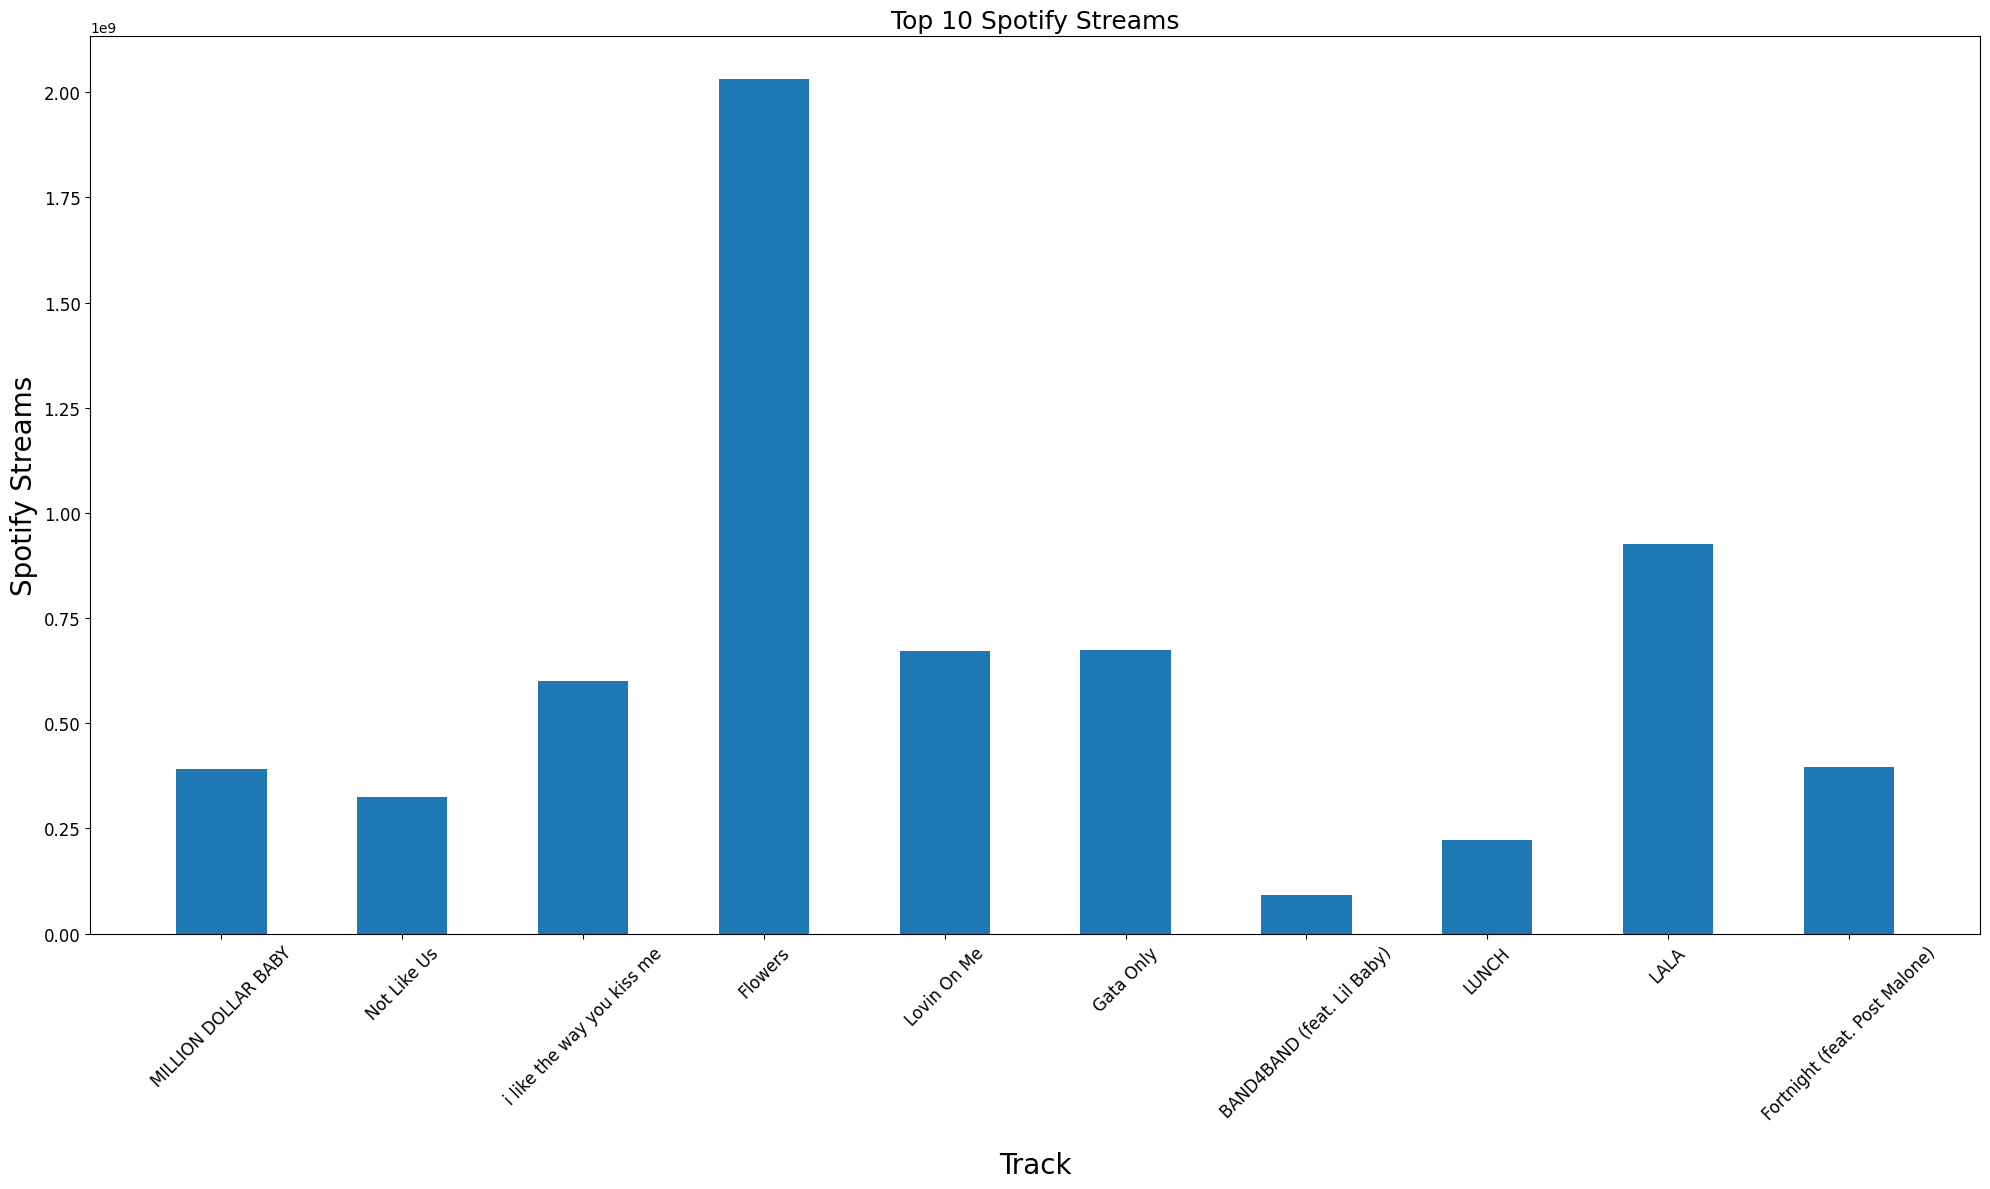

In [322]:
# Top 10 songs on spotify streams

plt.figure(figsize=(20, 12))
plt.bar(Track_10, spotify_streams_10, width=0.5)  # Create the bar chart

plt.xlabel("Track", fontsize=20, labelpad=20)
plt.ylabel("Spotify Streams", fontsize=20)
plt.title("Top 10 Spotify Streams", fontsize=18)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

In [323]:
# Top 10 artist with most number of songs

artist_name = df["Artist"].value_counts()
artist_nsong_10 = artist_name.head(10)

In [324]:
artist_nsong_10

Artist
Bad Bunny        40
Drake            31
Taylor Swift     28
KAROL G          26
Billie Eilish    21
Ariana Grande    19
Travis Scott     19
The Weeknd       18
Juice WRLD       18
Post Malone      17
Name: count, dtype: int64

<ipython-input-325-988d6c8594ec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_nsong_10.values,y=artist_nsong_10.index,palette='viridis')


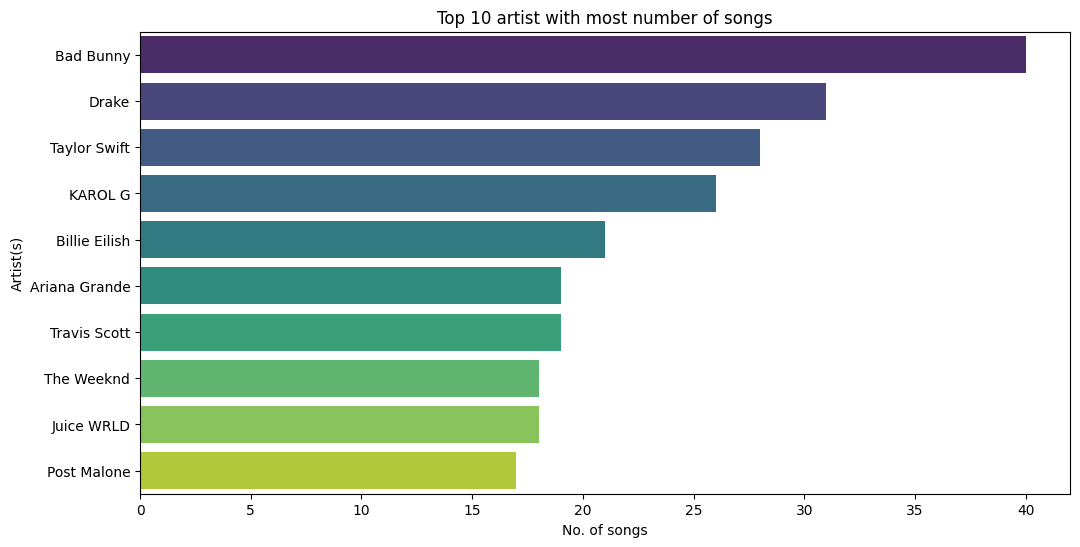

In [325]:
plt.figure(figsize=(12,6))
sns.barplot(x=artist_nsong_10.values,y=artist_nsong_10.index,palette='viridis')
plt.xlabel('No. of songs')
plt.ylabel('Artist(s)')
plt.title('Top 10 artist with most number of songs')
plt.show;

In [326]:
df.columns

Index(['Track', 'Album Name', 'Artist', 'All Time Rank', 'Track Score',
       'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'Deezer Playlist Count',
       'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams',
       'Pandora Track Stations', 'Shazam Counts', 'Explicit Track', 'Month',
       'Year', 'date'],
      dtype='object')

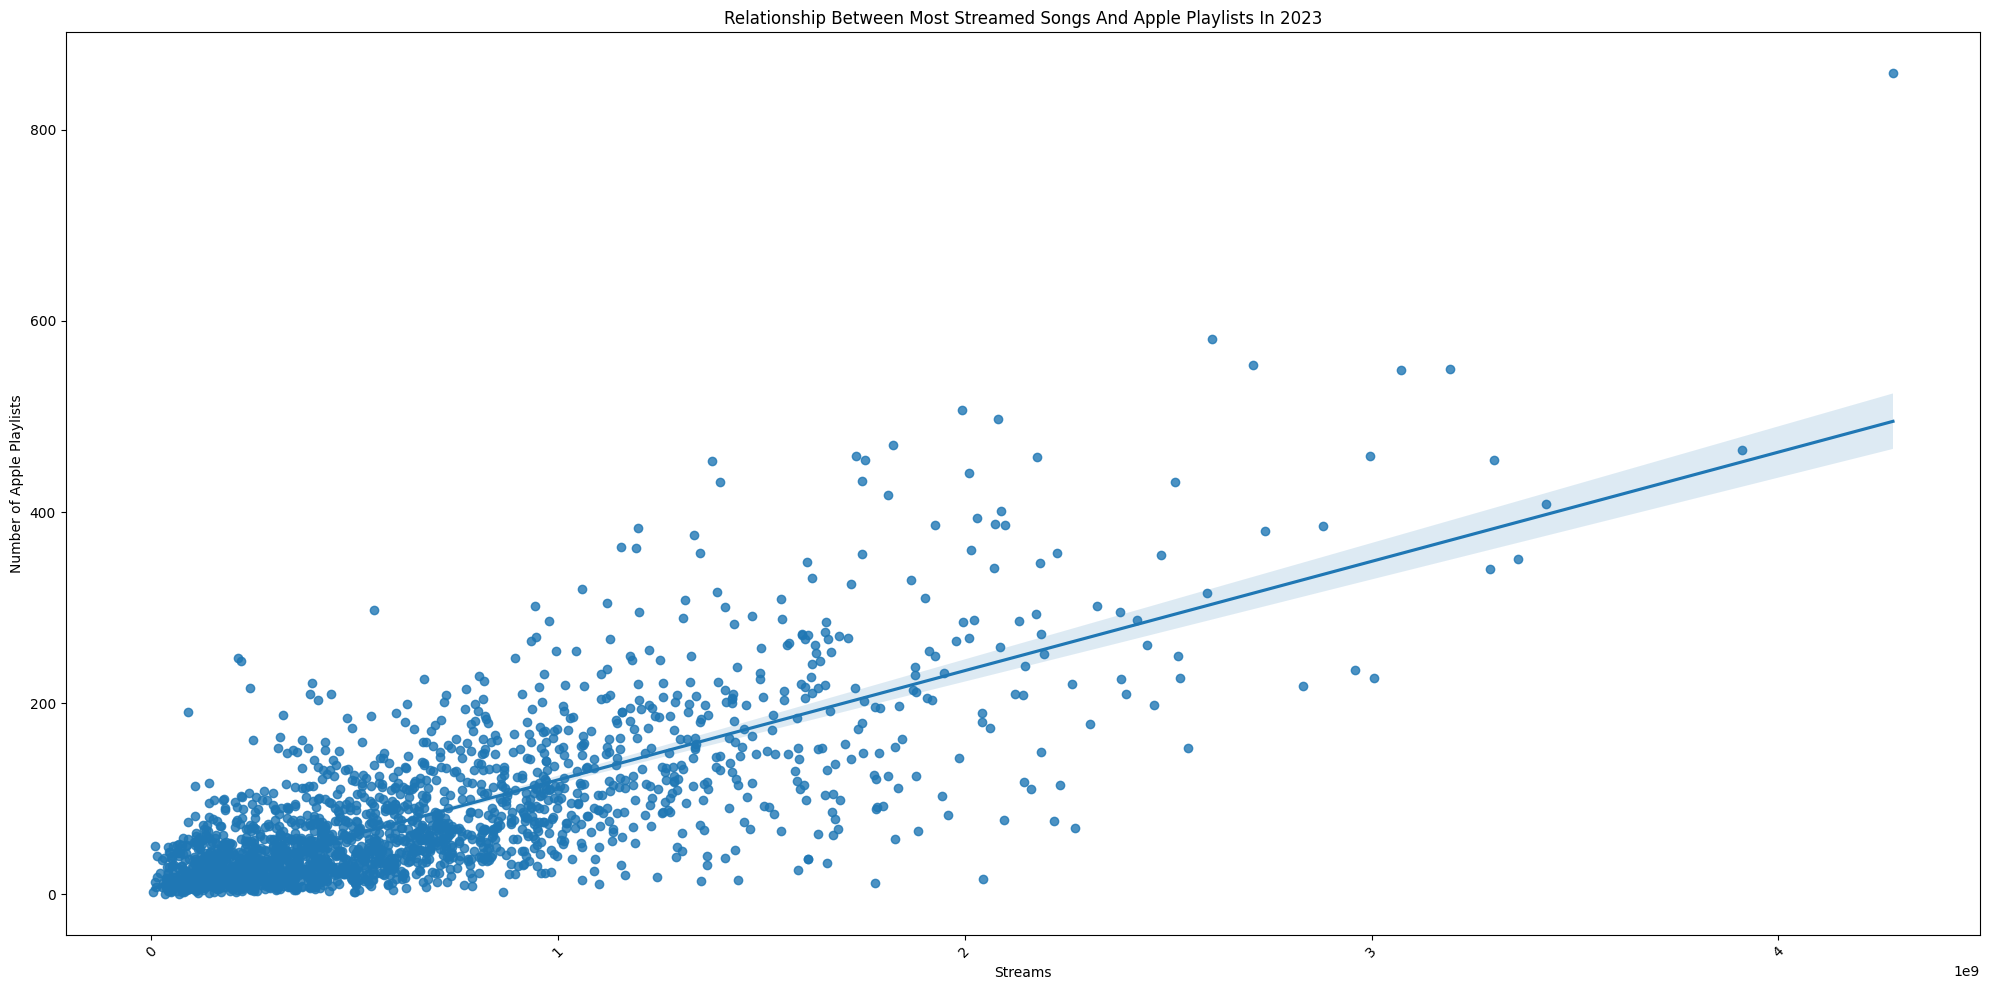

In [327]:
plt.figure(figsize = (20, 10))

sns.regplot(x = 'Spotify Streams', y = 'Apple Music Playlist Count', data = df, scatter = True, fit_reg = True)

plt.title('Relationship Between Most Streamed Songs And Apple Playlists In 2023')
plt.xlabel('Streams')
plt.ylabel('Number of Apple Playlists')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()